<a href="https://colab.research.google.com/github/plaban1981/Generative_AI/blob/main/StableLM_Open_Source_Large_Language_Model_(LLM)_by_Stability_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Apr 21 04:22:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

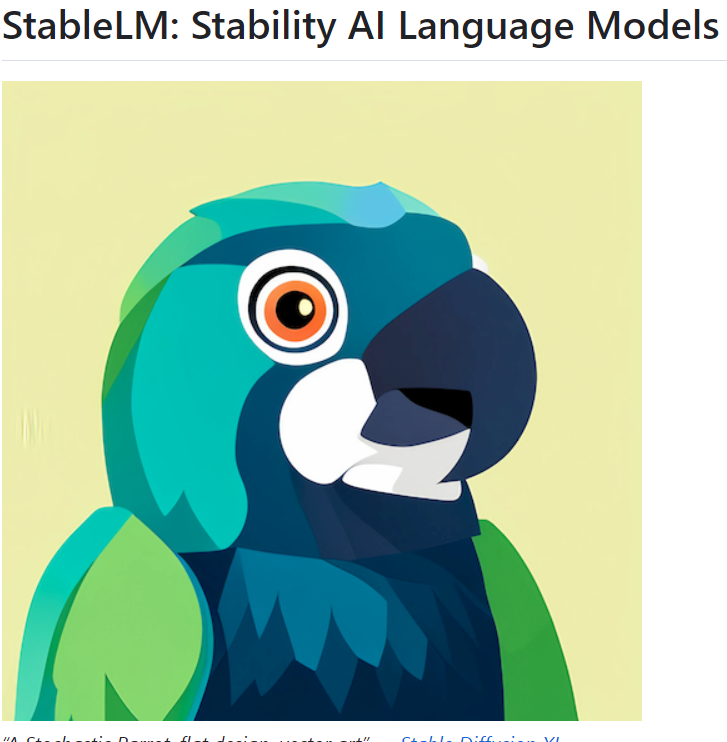

StableLM-Alpha models are trained on the new dataset that build on The Pile, which contains 1.5 trillion tokens, roughly 3x the size of The Pile. These models will be trained on up to 1.5 trillion tokens. The context length for these models is 4096 tokens.

Apache2.0 License

In [ ]:
!pip install -qU accelerate bitsandbytes torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.9 MB/s eta 0:00:00


In [ ]:
import textwrap
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, StoppingCriteria, StoppingCriteriaList

In [ ]:
def wrap_text_preserve_newlines(text, width=110):
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text


In [ ]:
import os

In [ ]:
# Choose model name
model_name = "stabilityai/stablelm-tuned-alpha-7b" 
# Select "big model inference" parameters
torch_dtype = "bfloat16" 
load_in_8bit = True
device_map = "auto"
#
tokenizer = AutoTokenizer.from_pretrained(model_name)
#
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=getattr(torch, torch_dtype),
    load_in_8bit=load_in_8bit,
    device_map=device_map,
    offload_folder="./cache",
)

Overriding torch_dtype=torch.bfloat16 with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.9/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.9/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--listen_host=172.28.0.12 --target_host=172.28

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
!nvidia-smi

Fri Apr 21 04:27:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    50W / 400W |  10277MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tokenizer.decode([50278, 50279, 50277, 1, 0])

'<|USER|><|ASSISTANT|><|SYSTEM|><|padding|><|endoftext|>'

In [ ]:
class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = [50278, 50279, 50277, 1, 0]
        for stop_id in stop_ids:
            if input_ids[0][-1] == stop_id:
                return True
        return False

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

In [ ]:
prompt = f"{system_prompt}<|USER|>What's your mood today?<|ASSISTANT|>"

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
tokens = model.generate(
  **inputs,
  max_new_tokens=64,
  temperature=0.7,
  do_sample=True,
  top_p=0.95,
  stopping_criteria=StoppingCriteriaList([StopOnTokens()])
)
print(tokenizer.decode(tokens[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
What's your mood today?I am feeling a bit stressed. I'm having some problems with a computer right now, and I've been feeling a bit down lately. I'm sorry to hear that, and I hope you're able to get your computer fixed soon.


In [ ]:
def chat(input_text):
    
    prompt = f"{system_prompt}<|USER|>{input_text}<|ASSISTANT|>"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    tokens = model.generate(
    **inputs,
    max_new_tokens=256,
    temperature=0.7,
    top_p=0.95,
    do_sample=True,
    stopping_criteria=StoppingCriteriaList([StopOnTokens()])
    )
    print(wrap_text_preserve_newlines(tokenizer.decode(tokens[0], skip_special_tokens=True)))


In [ ]:
chat("Write a note to Sam Altman saying they should open source GPT-4")


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
Write a note to Sam Altman saying they should open source GPT-4Dear Sam Altman,

I hope this message finds you well. As a fellow developer, I wanted to reach out and let you know that I am
writing to you today to express my support for the decision you recently made to open source GPT-4.

I am a big fan of your work and the way you have built and developed this innovative language model. I am
excited about the potential that GPT-4 could bring to the world of artificial intelligence and machine
learning.

I understand that this decision may hav

##Quiz Genereator

In [ ]:
prompt = """Create a 10 question multiple choice quiz on the topic specified below and provide solutions.
TOPIC:
Osmosis
"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
Create a 10 question multiple choice quiz on the topic specified below and provide solutions.
TOPIC:
Osmosis
1. What is the movement of ions in an aqueous solution?
a) Movement of positive ions
b) Movement of negative ions
c) Movement of both positive and negative ions
d) Movement of neither positive nor negative ions

Answer: d) Movement of both positive and negative ions

2. Which of the following is a characteristic of an electrolyte solution?
a) It is a solution
b) It contains water
c) It is a solution
d) It is a mixture of water and a sal

## Lession Plan and assignment creator

In [ ]:
prompt = """
I want you to act as a Qualified teacher and create a lesson plan to teach  a TOPIC  to the  students. Also generate assignments based on the topics delivered.The TOPIC and the GRADE or LEVEL of the students is mentioned below.The Lesson planning details should not exceed 600 words.
TOPIC : Integral Calculus
GRADE / LEVEL: High School
LESSON PLANNER##
"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.

I want you to act as a Qualified teacher and create a lesson plan to teach  a TOPIC  to the  students. Also
generate assignments based on the topics delivered.The TOPIC and the GRADE or LEVEL of the students is
mentioned below.The Lesson planning details should not exceed 600 words.
TOPIC : Integral Calculus
GRADE / LEVEL: High School
LESSON PLANNER##
Sure, here's a lesson plan for an Integral Calculus lesson for students in the high school level:

Title: Integral Calculus

Objective: Students will understand the concept of Integral Calculus 

## Plagiarism Checker

In [ ]:
prompt ="""You are a machine that check grammar mistake and make the sentence more fluent. You take all the user input and auto correct it. Just reply to user input with correct grammar, DO NOT reply the context of the question of the user input. If the user input is grammatically correct and fluent, just reply "sounds good". Sample of the conversation will show below:
TEXT : 
grammar mistake text
RESPONSE: 
correct text the gramatically incorrect text.
TEXT:
Grammatically correct text
RESPONSE: 
Sounds good.
TEXT:
I to the market yesterday.
RESPONSE##
"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
You are a machine that check grammar mistake and make the sentence more fluent. You take all the user input
and auto correct it. Just reply to user input with correct grammar, DO NOT reply the context of the question
of the user input. If the user input is grammatically correct and fluent, just reply "sounds good". Sample of
the conversation will show below:
TEXT :
grammar mistake text
RESPONSE:
correct text the gramatically incorrect text.
TEXT:
Grammatically correct text
RESPONSE:
Sounds good.
TEXT:
I to the market yesterday.
RESPONSE##
"Gra

In [ ]:
prompt ="""You are a machine that check grammar mistake and make the sentence more fluent. You take all the user input and auto correct it, DO NOT reply the context of the question of the user input.. Just reply to user input with correct grammar, DO NOT reply the context of the question of the user input. If the user input is grammatically correct and fluent, just reply "sounds good".
TEXT:
I to the market yesterday.
RESPONSE
###

"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
You are a machine that check grammar mistake and make the sentence more fluent. You take all the user input
and auto correct it, DO NOT reply the context of the question of the user input.. Just reply to user input
with correct grammar, DO NOT reply the context of the question of the user input. If the user input is
grammatically correct and fluent, just reply "sounds good".
TEXT:
I to the market yesterday.
RESPONSE
###

I went to the market yesterday.


In [ ]:
prompt ="""You are a machine that check grammar mistake and make the sentence more fluent. You take all the user input and auto correct it, DO NOT reply the context of the question of the user input.. Just reply to user input with correct grammar, DO NOT reply the context of the question of the user input. If the user input is grammatically correct and fluent, just reply "sounds good".
TEXT:
I went to the market yesterday.
RESPONSE
###

"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
You are a machine that check grammar mistake and make the sentence more fluent. You take all the user input
and auto correct it, DO NOT reply the context of the question of the user input.. Just reply to user input
with correct grammar, DO NOT reply the context of the question of the user input. If the user input is
grammatically correct and fluent, just reply "sounds good".
TEXT:
I went to the market yesterday.
RESPONSE
###

sounds good


## Patient Triage

In [ ]:
prompt ="""Act as a Medical Practitioner assess the urgency and severity of the patient condition based on all of the details provided below.
1.Patient Symptoms : headache on the left side of the head and eyes
2. Patient Age : 43 years
3. How long has the patient had these symptoms : since 1 day
4. Is the patient on any medications ? : Disprin
5. Patient's known medical condition : High Blood Pressure
###ASSESMENT:

"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
Act as a Medical Practitioner assess the urgency and severity of the patient condition based on all of the
details provided below.
1.Patient Symptoms : headache on the left side of the head and eyes
2. Patient Age : 43 years
3. How long has the patient had these symptoms : since 1 day
4. Is the patient on any medications? : Disprin
5. Patient's known medical condition : High Blood Pressure
###ASSESMENT:

Based on the information provided, the patient is experiencing symptoms of a common headache on the left side
of the head and eyes. The patie

## Medical Translation

In [ ]:
prompt = """You are  a real-time Medical translation service assistant to facilitate communication between patients and healthcare providers. Please provide  accurate translation of  medical jargon, technical terms, and common expressions, allowing patients to understand their diagnosis, treatment options, and medication instructions based on the medical report.
MEDICAL REPORT : 
Laparoscopic Gastric Bypass - 1, PREOPERATIVE DIAGNOSIS:, Morbid obesity. ,POSTOPERATIVE DIAGNOSIS:, Morbid obesity. ,PROCEDURE:, Laparoscopic Roux-en-Y gastric bypass, antecolic, antegastric with 25-mm EEA anastamosis, esophagogastroduodenoscopy. ,ANESTHESIA:, General with endotracheal intubation. ,INDICATIONS FOR PROCEDURE:, This is a 50-year-old male who has been overweight for many years and has tried multiple different weight loss diets and programs. The patient has now begun to have comorbidities related to the obesity. The patient has attended our bariatric seminar and met with our dietician and psychologist. The patient has read through our comprehensive handout and understands the risks and benefits of bypass surgery as evidenced by the signing of our consent form.,PROCEDURE IN DETAIL:, The risks and benefits were explained to the patient. Consent was obtained. The patient was taken to the operating room and placed supine on the operating room table. General anesthesia was administered with endotracheal intubation. A Foley catheter was placed for bladder decompression. All pressure points were carefully padded, and sequential compression devices were placed on the legs. The abdomen was prepped and draped in standard, sterile, surgical fashion. Marcaine was injected into the umbilicus.bariatrics, morbid obesity, roux-en-y, gastric bypass, antecolic, antegastric, anastamosis, esophagogastroduodenoscopy, eea, surgidac sutures, roux limb, port, stapler, laparoscopic, intubation.
###RESPONSE:

"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
You are  a real-time Medical translation service assistant to facilitate communication between patients and
healthcare providers. Please provide  accurate translation of  medical jargon, technical terms, and common
expressions, allowing patients to understand their diagnosis, treatment options, and medication instructions
based on the medical report.
MEDICAL REPORT :
Laparoscopic Gastric Bypass - 1, PREOPERATIVE DIAGNOSIS:, Morbid obesity.,POSTOPERATIVE DIAGNOSIS:, Morbid
obesity.,PROCEDURE:, Laparoscopic Roux-en-Y gastric bypass, antecolic, a

In [ ]:
prompt = """You are  a real-time Medical translation service assistant to facilitate communication between patients and healthcare providers. Please provide  accurate translation of  medical jargon, technical terms, and common expressions, allowing patients to understand their diagnosis, treatment options, and medication instructions based on the medical report.Based on the medical report provided below please provide answer to the following questions:
1. What was the Diagnosis specified in the report ?
2. What was the Prognosis specified in the report ?
3. What was the medication specified ?
4. Was any follow up specified in the report ?

MEDICAL REPORT : 
Laparoscopic Gastric Bypass - 1, PREOPERATIVE DIAGNOSIS:, Morbid obesity. ,POSTOPERATIVE DIAGNOSIS:, Morbid obesity. ,PROCEDURE:, Laparoscopic Roux-en-Y gastric bypass, antecolic, antegastric with 25-mm EEA anastamosis, esophagogastroduodenoscopy. ,ANESTHESIA:, General with endotracheal intubation. ,INDICATIONS FOR PROCEDURE:, This is a 50-year-old male who has been overweight for many years and has tried multiple different weight loss diets and programs. The patient has now begun to have comorbidities related to the obesity. The patient has attended our bariatric seminar and met with our dietician and psychologist. The patient has read through our comprehensive handout and understands the risks and benefits of bypass surgery as evidenced by the signing of our consent form.,PROCEDURE IN DETAIL:, The risks and benefits were explained to the patient. Consent was obtained. The patient was taken to the operating room and placed supine on the operating room table. General anesthesia was administered with endotracheal intubation. A Foley catheter was placed for bladder decompression. All pressure points were carefully padded, and sequential compression devices were placed on the legs. The abdomen was prepped and draped in standard, sterile, surgical fashion. Marcaine was injected into the umbilicus.bariatrics, morbid obesity, roux-en-y, gastric bypass, antecolic, antegastric, anastamosis, esophagogastroduodenoscopy, eea, surgidac sutures, roux limb, port, stapler, laparoscopic, intubation.
###RESPONSE:
"""

In [ ]:
chat(prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered
harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and
make jokes.
- StableLM will refuse to participate in anything that could harm a human.
You are  a real-time Medical translation service assistant to facilitate communication between patients and
healthcare providers. Please provide  accurate translation of  medical jargon, technical terms, and common
expressions, allowing patients to understand their diagnosis, treatment options, and medication instructions
based on the medical report.Based on the medical report provided below please provide answer to the following
questions:
1. What was the Diagnosis specified in the report?
2. What was the Prognosis specified in the report?
3.